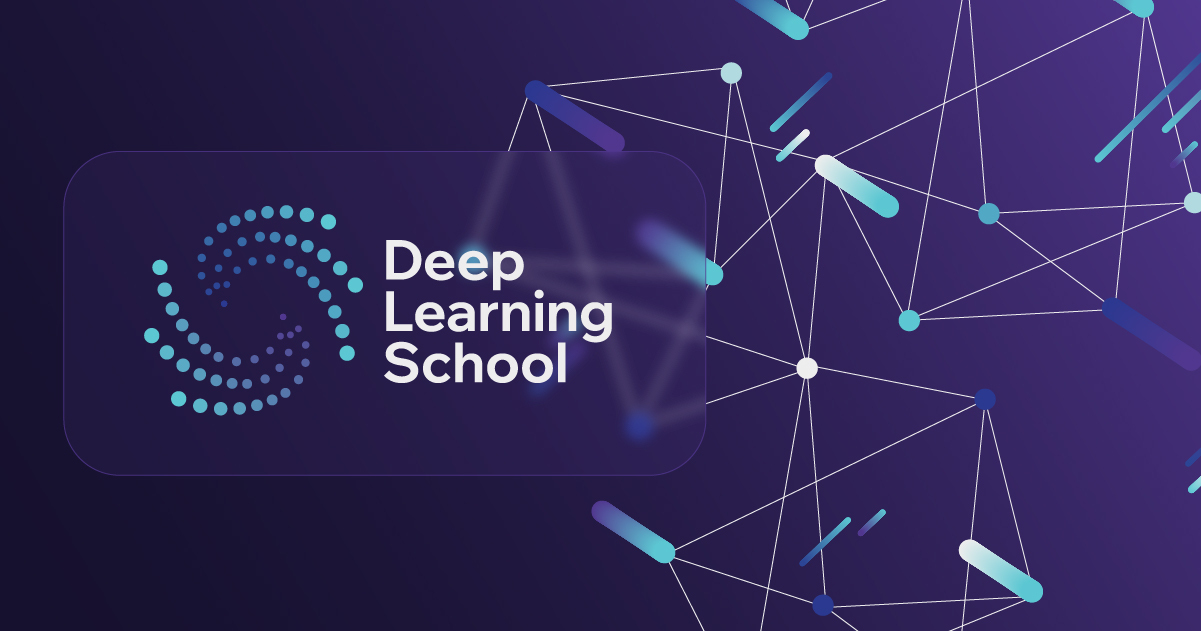

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

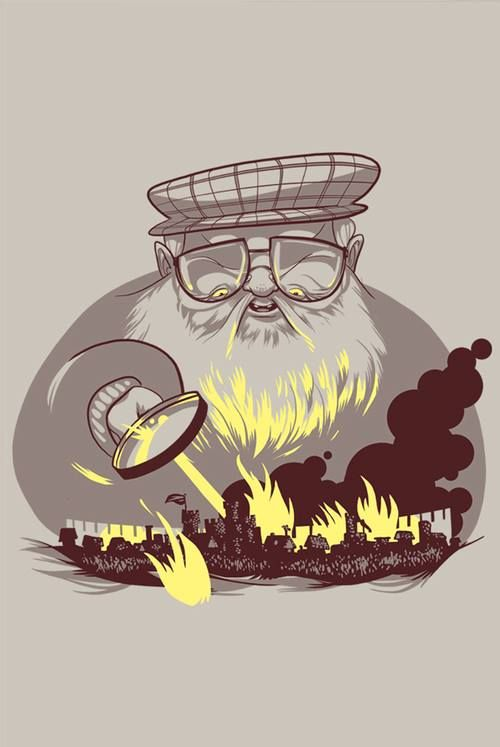

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.65$ --- 5 баллов

2) $0.65 > score \geqslant 0.50$ --- 4 балла

3) $0.50 > score \geqslant 0.45$ --- 3 балла

4) $0.45 > score \geqslant 0.40$ --- 2 балла

5) $0.40 > score \geqslant 0.35$ --- 1 балл

6) $0.35 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [568]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 47.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 72.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [570]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

print(f'Размер train: {data.shape}')
print(f'Размер  test: {data_test.shape}')

Размер train: (1557, 25)
Размер  test: (389, 24)


In [571]:
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


Посмотрите, какие типы данных представлены в нашем датасете

Знакомый нам метод describe() возвращает различную информацию для столбцов с числовыми типами данных, и с типами данных *object*

Давайте посмотрим на вывод для типа данных *object*. Для этого:
- сначала применим метод describe(). Укажем в качестве аргумента тип данных столбцов, статистику по которым мы хотим посмотреть (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- для удобства восприятия транспонируем таблицу

In [572]:
# data.info() увидим что есть object, int64, float64.

# object
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


In [573]:
data_test.describe(include = 'object').T

,count,unique,top,freq
name,389,389,Tytos Lannister,1
title,221,109,Ser,78
culture,189,48,Northmen,30
mother,3,3,Dyanna Dayne,1
father,4,4,Maekar I Targaryen,1
heir,2,2,Duncan Targaryen,1
house,343,137,House Targaryen,22
spouse,76,75,Tyrion Lannister,2


Теперь давайте посмотрим на столбцы с числовыми типами данных. Дополните код ниже. Для удобства восприятия мы транспонировали таблицу и ограничили вывод тремя столбцами - количество строк без NaN, максимальное и минимальное значение (о кастомизации вариантах вывода describe() вы можете почитать в документации по ссылке выше).


In [574]:
data.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
dateOfBirth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
isAliveMother,18.0,0.0,1.0
isAliveFather,22.0,0.0,1.0
isAliveHeir,21.0,0.0,1.0


In [575]:
data_test.describe(include = ['int64', 'float64']).T[['count', 'min', 'max']]

# види что странные значения в age и dateOfBirth, возможно выбросы

,count,min,max
male,389.0,0.0,1.0
dateOfBirth,154.0,-28.0,298299.0
book1,389.0,0.0,1.0
book2,389.0,0.0,1.0
book3,389.0,0.0,1.0
book4,389.0,0.0,1.0
book5,389.0,0.0,1.0
isAliveMother,3.0,1.0,1.0
isAliveFather,4.0,0.0,0.0
isAliveHeir,2.0,0.0,1.0


Так мы проверим, есть ли в данных неадекватнные значения.   Большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа (анонс - а в тестовых данных нас будет ждать сюрприз).

**Задание 1.3.** Предобработка (очистка) данных.

В нашем домашнем задании все пропуски в данных (missing values) уже закодированы как NaN. Проанализируйте, в каких колонках и как часто встречаются NaN значения. Далее вам надо будет принять решение, как их обрабатывать.

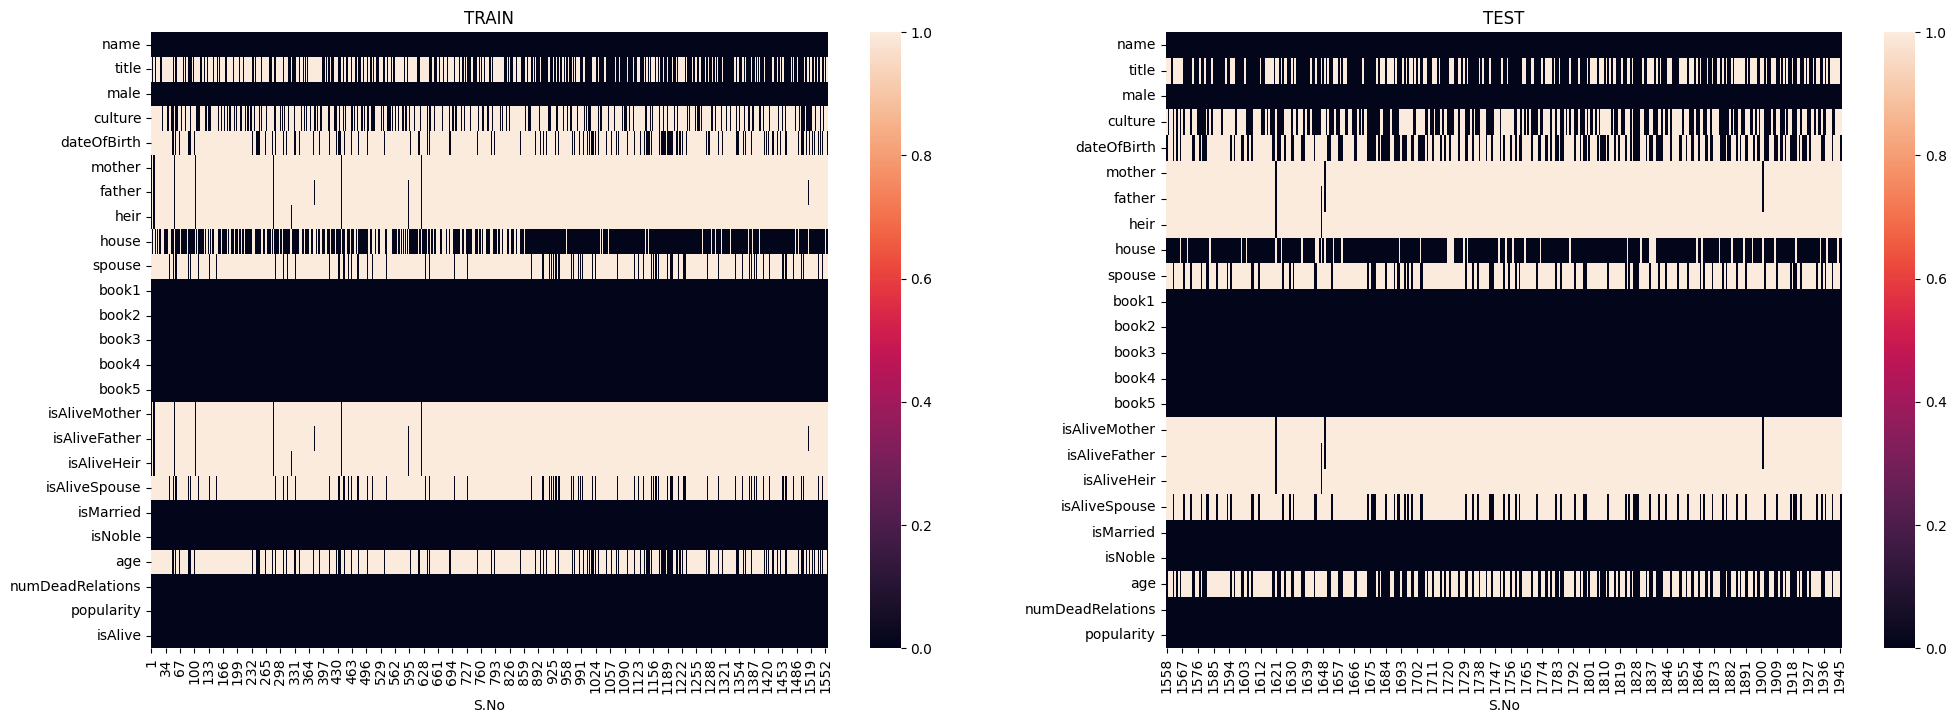

In [576]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

sns.heatmap(data.isna().transpose(), ax=ax1)
ax1.set_title('TRAIN')

sns.heatmap(data_test.isna().transpose(), ax=ax2)
ax2.set_title('TEST')

plt.show()

In [577]:
# только пропуски train
data.isna().sum()[data.isna().sum() > 0]

,0
title,840
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357
isAliveMother,1539
isAliveFather,1535


In [578]:
# только пропуски test
data_test.isna().sum()[data_test.isna().sum() > 0]

,0
title,168
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313
isAliveMother,386
isAliveFather,385


In [579]:
print(f'Доля всех пропусков в train: {round(data.isna().mean().mean().tolist() * 100, 2)}%')
print(f'Доля всех пропусков в test: {round(data_test.isna().mean().mean().tolist() * 100, 2)}%')

Доля всех пропусков в train: 43.11%
Доля всех пропусков в test: 40.98%


В этом задании удалять строки с NaN (dropna) мы не будем по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     



Как вы могли заметить, в наших данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)

Ниже мы посмотрим, как можно работать с признаками с большим количеством пропущенных значений.

**Задание 1.4.** Числовые признаки

У нас есть **признак popularity**. Постройте гистограмму распределения данного признака с количеством интервалов (bins), равным 50 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

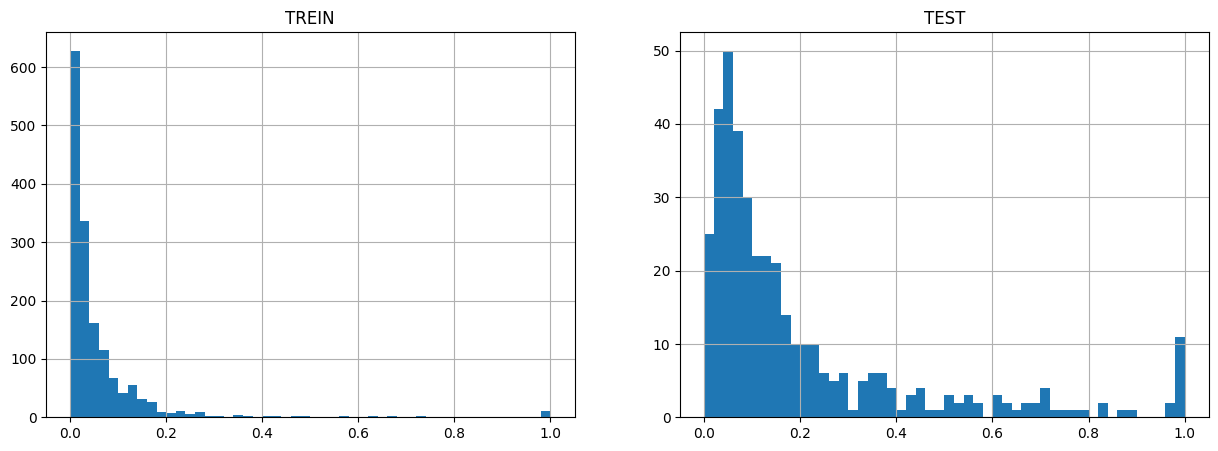

In [580]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

data.popularity.hist(bins=50, ax=ax1)
ax1.set_title('TREIN')

data_test.popularity.hist(bins=50, ax=ax2)
ax2.set_title('TEST')

plt.show()

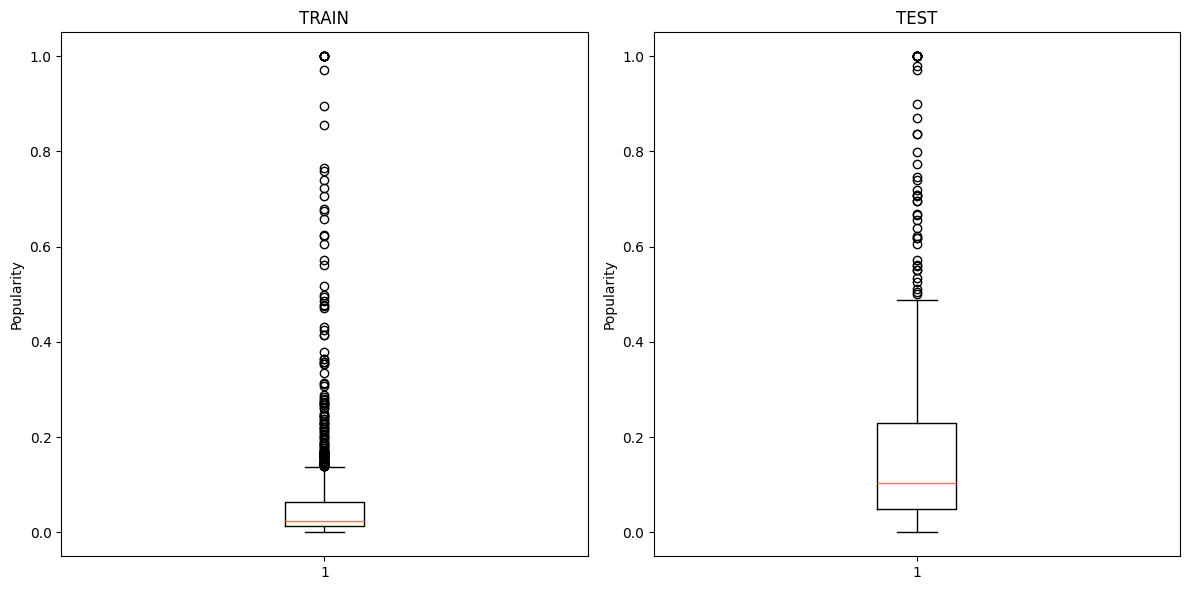

In [581]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.boxplot(data.popularity)
ax1.set_title('TRAIN')
ax1.set_ylabel('Popularity')

ax2.boxplot(data_test.popularity)
ax2.set_title('TEST')
ax2.set_ylabel('Popularity')

plt.tight_layout()
plt.show()


**Видим большую скошенность гистограмм вправо, с правосторонней скошенность
можно побороться логарифмированием, что и сделаем дальше,так же видим огромное кол-во выбросов на боксплотах, надо уменьшать...**


Распределение сильно несимметрично. Можно преобразовать данный признак, например, по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M можно попробовать, например, M=100 или другое число.

При желании для `popularity` вы можете использовать свой способ шкалирования признаков с несимметричным распределением.


In [582]:
data.popularity = np.log10(data.popularity * 100 + 1)
data_test.popularity = np.log10(data_test.popularity * 100 + 1)

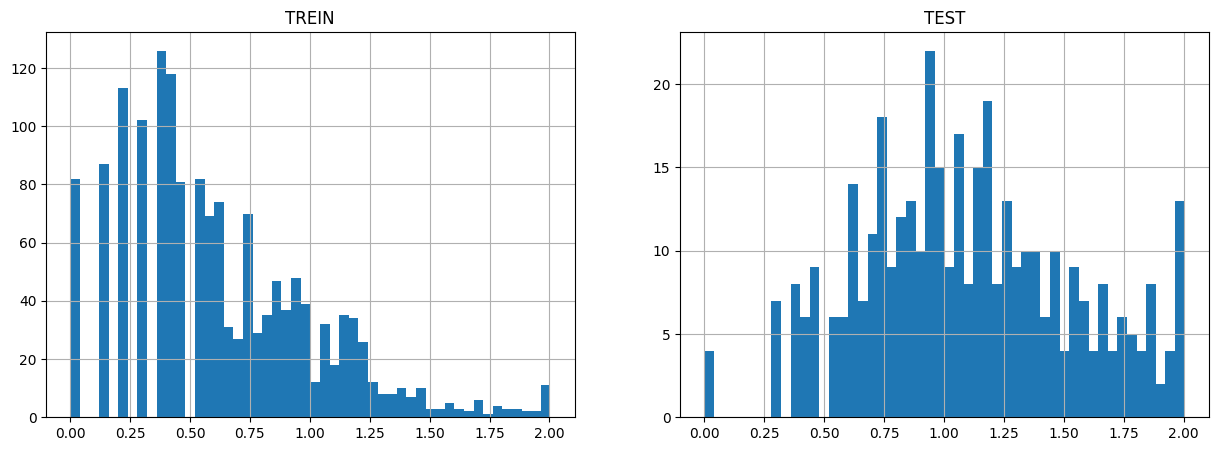

In [583]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

data.popularity.hist(bins=50, ax=ax1)
ax1.set_title('TREIN')

data_test.popularity.hist(bins=50, ax=ax2)
ax2.set_title('TEST')

plt.show()

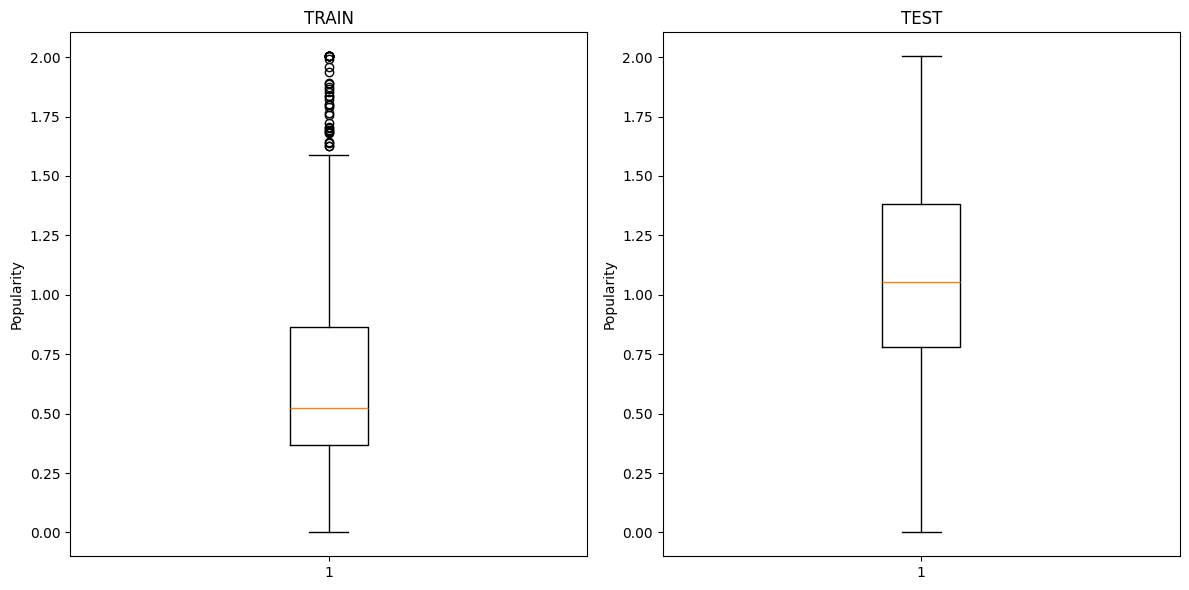

In [584]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.boxplot(data.popularity)
ax1.set_title('TRAIN')
ax1.set_ylabel('Popularity')

ax2.boxplot(data_test.popularity)
ax2.set_title('TEST')
ax2.set_ylabel('Popularity')

plt.tight_layout()
plt.show()

**Видим, что признак в разы улучшился(на trein гист стал хоть немного похожим на нормальное распределение, не идеал конечно, но лучше, выбросов стало меньше), хорошо заметны улучшения на test**

В качестве альтернативного подхода вы можете попробовать дискретизацию признака popularity на основе квантилей (quantile binning), используя функцию qcut() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html). В этом случае вы преобразуете числовой признак popularity в категориальный, для которого в дальнейшем надо будет применить one-hot кодирование.

**не хочу, попробовал, не понравилось**

Теперь давайте обработаем **признак numDeadRelations**.
Посмотрите на частотное распределение этого признака. Лишь для малого числа персонажей `numDeadRelations>0`.

Создайте признак `boolDeadRelations`. Давайте упростим признак `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

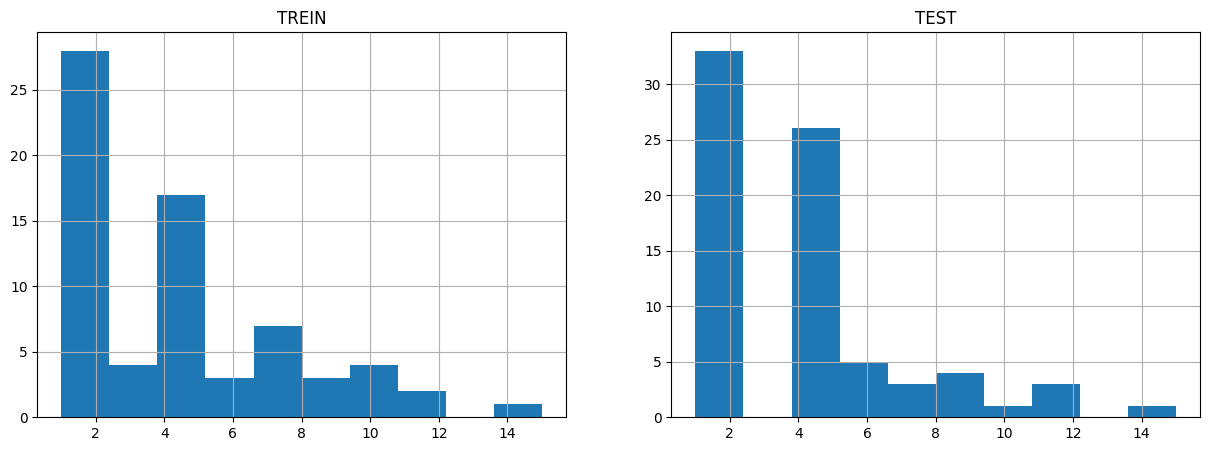

In [585]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

data.query('numDeadRelations > 0')['numDeadRelations'].hist(ax=ax1)
ax1.set_title('TREIN')

data_test.query('numDeadRelations > 0')['numDeadRelations'].hist(ax=ax2)
ax2.set_title('TEST')

plt.show()

In [586]:
data['boolDeadRelations'] = np.where(data.numDeadRelations > 0, 1, 0)
data_test['boolDeadRelations'] = np.where(data_test.numDeadRelations > 0, 1, 0)

data.drop(columns='numDeadRelations', inplace=True)
data_test.drop(columns='numDeadRelations', inplace=True)

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [587]:
# data['age_value'] = ...# ДОБАВЬТЕ ВАШ КОД
# data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

#___________________________________________________________________________
**В общем, у меня немного своя идея по предобработке AGE, давай, друг, разберемся**

**Сначала создадим доп признак**
* sum_age_birth - если dateOfBirth + age = 305, то живой(1), если нет то мертв(0), пропуск = -1

* этро логично, ваш возраст + дата рождения = текущий год

* потом мы поделим возраст по категориям и присвои нужные значение(ЭТО НЕ СРАЗУ, т.к age будем заполнять опираясь на другие признаки, которые тоже еще нужно заполнить)
#___________________________________________________________________________

In [588]:
# title: пусть 1-если он есть, 0-если нет
# (ну вот так бывает, что человек не добился титула, простой работяга какойт)

data.title = np.where(data.title.isna(), 0, 1)
data_test.title = np.where(data_test.title.isna(), 0, 1)

In [589]:
data['age_sum_birth'] = np.where(
    data.age.isna() & data.dateOfBirth.isna(), -1,
    np.where(data.age + data.dateOfBirth == 305, 1, 0))

data_test['age_sum_birth'] = np.where(
    data_test.age.isna() & data_test.dateOfBirth.isna(), -1,
    np.where(data_test.age + data_test.dateOfBirth == 305, 1, 0))

# дропнем фичу dateOfBirth, больше не нужна, у нас и так есть age, связанная с возрастом, и age_sum_bith
data.drop(columns='dateOfBirth', inplace=True)
data_test.drop(columns='dateOfBirth', inplace=True)

# вспомним о подозрительных значениях в age

In [590]:
data_test.query('age < 0')

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,boolDeadRelations,age_sum_birth
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,0,0,Lysene,NaN,NaN,NaN,House Targaryen,NaN,1,...,NaN,NaN,NaN,NaN,0,0,-277980.0,1.080511,0,0
1869,Rhaego,0,0,NaN,NaN,NaN,NaN,House Targaryen,NaN,1,...,NaN,NaN,NaN,NaN,0,0,-298001.0,1.248523,1,0


In [591]:
# поменям на NaN(у нас уже есть информация о смертности),
# ибо дальше я напишу классификатор, который превратит фичу age в категориальную
data_test.age = np.where(data_test.age < 0, np.nan, data_test.age)

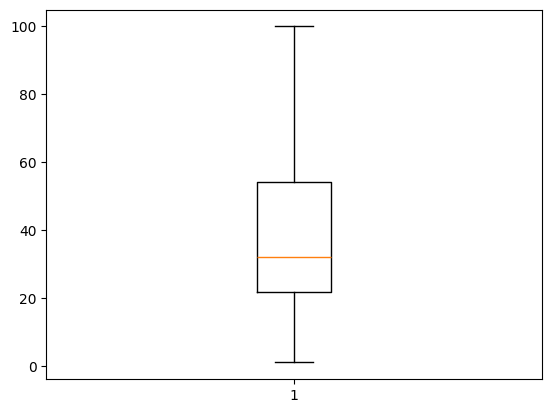

In [592]:
plt.boxplot(data_test.age.dropna())
plt.show()

In [593]:
def age_classificator(age):
  if age < 16:
    return 'child'
  elif 16 <= age < 25:
    return 'young'
  elif 25 <= age < 40:
    return 'adult'
  elif age >= 40:
    return 'old'

data['age'] = data['age'].apply(lambda x: age_classificator(x))
data_test['age'] = data_test['age'].apply(lambda x: age_classificator(x))

In [594]:
# возьмем 3 признака: title isMarried	isNoble,
# пусть old, если все единицы (повидал жизни, добился много всего)
# пусть adult, если 2 любые единицы
# пусть young, если 1 людая единицы
# остальное = child

def calculate_age_category(title, isMarried, isNoble):
    summ = title + isMarried + isNoble
    if summ == 3:
        return 'old'
    elif summ == 2:
        return 'adult'
    elif summ == 1:
        return 'young'
    else:
        return 'child'

In [595]:
data['age'] = data.apply(
    lambda x: calculate_age_category(x.title, x.isMarried, x.isNoble)
    if x.age_sum_birth == -1 else x.age,
    axis=1
)
data_test['age'] = data_test.apply(
    lambda x: calculate_age_category(x.title, x.isMarried, x.isNoble)
    if x.age_sum_birth == -1 else x.age,
    axis=1
)

In [596]:
# предобработаю позже!!!!!!!!
data_test[data_test['age'].isna()]

,name,title,male,culture,mother,father,heir,house,spouse,book1,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,boolDeadRelations,age_sum_birth
S.No,,,,,,,,,,,,,,,,,,,,,
1685,Doreah,0,0,Lysene,NaN,NaN,NaN,House Targaryen,NaN,1,...,NaN,NaN,NaN,NaN,0,0,None,1.080511,0,0
1869,Rhaego,0,0,NaN,NaN,NaN,NaN,House Targaryen,NaN,1,...,NaN,NaN,NaN,NaN,0,0,None,1.248523,1,0


In [598]:
data.age.value_counts()

,count
age,
child,687
adult,533
young,174
old,163


In [599]:
# books: если появлялся в 3ех последних, то 1, иначе 0
# думаю здесь будет связь между смертностью

data['books'] = np.where(data.book3 + data.book4 + data.book5 == 0, 0, 1)
data_test['books'] = np.where(data_test.book3 + data_test.book4 + data_test.book5 == 0, 0, 1)

data.drop(columns=['book1', 'book2', 'book3', 'book4','book5'], inplace = True)
data_test.drop(columns=['book1', 'book2', 'book3', 'book4','book5'], inplace = True)

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [600]:
data['culture'].value_counts(dropna=False)

,count
culture,
NaN,1069
Northmen,94
Ironborn,91
Free Folk,45
Braavosi,39
Valyrian,28
Ghiscari,17
Dornish,17
Dothraki,17


In [601]:
data_test.culture.value_counts(dropna=False)

,count
culture,
NaN,200
Northmen,30
Ironborn,21
Valyrian,15
Dornishmen,11
Valemen,9
Rivermen,9
Westeros,9
Ghiscari,8


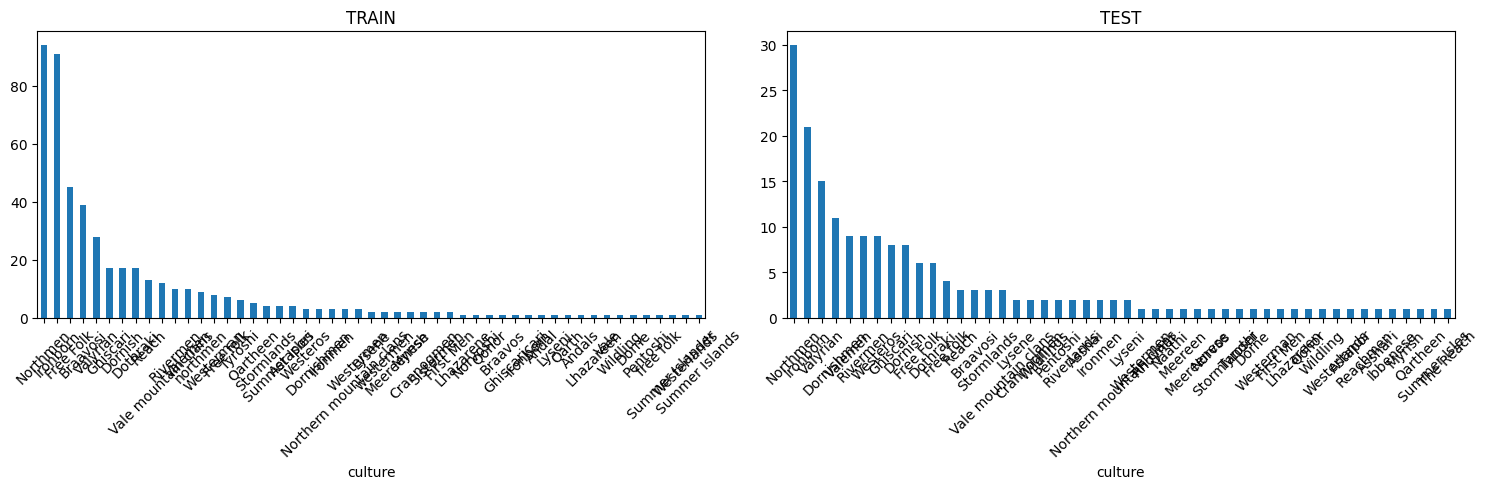

In [602]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

data.culture.value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('TRAIN')
ax1.tick_params(axis='x', rotation=45)

data_test.culture.value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('TEST')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

In [603]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'the Isles and Rivers': ['riverlands', 'rivermen'],
    'the Rock': ['westerman', 'westermen', 'westerlands'],
    'the Stormlands': ['stormlander', 'stormlands'],
    'the Reach': ['reach', 'reachmen', 'the reach'],
    'Dorne': ['dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

In [604]:
unique_house = data.house.str.lower().unique()
unique_cultere = data.culture.str.lower().unique()

coincidences = list()

for value in unique_house:
  if value in unique_cultere:
    coincidences.append(value)

coincidences

['wildling', 'summer islands']

In [605]:
# господа, нашел СЛУЧАЙНО, обратим внимание на house и на culture
data.iloc[[1256]]

,name,title,male,culture,mother,father,heir,house,spouse,isAliveMother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,popularity,isAlive,boolDeadRelations,age_sum_birth,books
S.No,,,,,,,,,,,,,,,,,,,,,
1257,Noho Dimittis,0,1,Braavosi,NaN,NaN,NaN,Iron Bank of Braavos,NaN,NaN,...,NaN,NaN,0,0,child,0.368806,1,0,-1,1


In [606]:
data.query('culture == "Braavosi"')['house'].isna().sum()

np.int64(34)

In [607]:
cult ={
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles', 'Summer Islander','Summer Islands', 'Summer Isles'],
    'Braavosi': ['braavosi', 'braavos', 'Braavos']
}

In [608]:
def replace_num(cult, data, data_test):
  replace_dict = dict()
  for key, values in cult.items():
    for item in values:
      replace_dict[item.lower()] = key

  data.culture = data.culture.str.lower().replace(replace_dict)
  data_test.culture = data_test.culture.str.lower().replace(replace_dict)

In [609]:
replace_num(cult, data, data_test)

In [610]:
data.culture = np.where(data.house == 'Summer Islands', 'Summer Islands', data.culture)
data.culture = np.where(data.house == 'Iron Bank of Braavos', 'Braavosi', data.culture)
data.culture = np.where(data.house == 'wildling', 'wildling', data.culture)

data_test.culture = np.where(data_test.house == 'Summer Islands', 'Summer Islands', data_test.culture)
data_test.culture = np.where(data_test.house == 'Iron Bank of Braavos', 'Braavosi', data_test.culture)
data_test.culture = np.where(data_test.house == 'wildling', 'wildling', data_test.culture)

#обратка
data.house = np.where(data.culture == 'Summer Islands', 'Summer Islands', data.house)
data.house = np.where(data.culture == 'Braavosi', 'Iron Bank of Braavos', data.house)
data.house = np.where(data.culture == 'wildling', 'wildling', data.house)

data_test.house = np.where(data_test.culture == 'Summer Islands', 'Summer Islands', data_test.house)
data_test.house = np.where(data_test.culture == 'Braavosi', 'Iron Bank of Braavos', data_test.house)
data_test.house = np.where(data_test.culture == 'wildling', 'wildling', data_test.house)

In [611]:
# отлично! мы избавились примерно от 40 пропущенных признаков...
data.query('culture == "Braavosi"')['house'].isna().sum()

np.int64(0)

**Теперь применим функцию к основному словарю**

In [612]:
def replace_num(cult, data, data_test):
  replace_dict = dict()
  for key, values in cult.items():
    for item in values:
      replace_dict[item.lower()] = key

  data.culture = data.culture.str.lower().replace(replace_dict)
  data_test.culture = data_test.culture.str.lower().replace(replace_dict)

  data.culture = data.culture.fillna('culture_no_data')
  data_test.culture = data_test.culture.fillna('culture_no_data')

In [613]:
replace_num(cultures_grouped, data, data_test)

In [614]:
# видим что пропусков 1069 - culture_no_data
data.culture.value_counts()

,count
culture,
culture_no_data,1068
Essos Nations,109
the North,108
the Iron Islands,95
Other Nations,58
Old Nations,32
the Mountain and the Vale,25
Dorne,21
the Rock,14


Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [615]:
# заменил(выше)

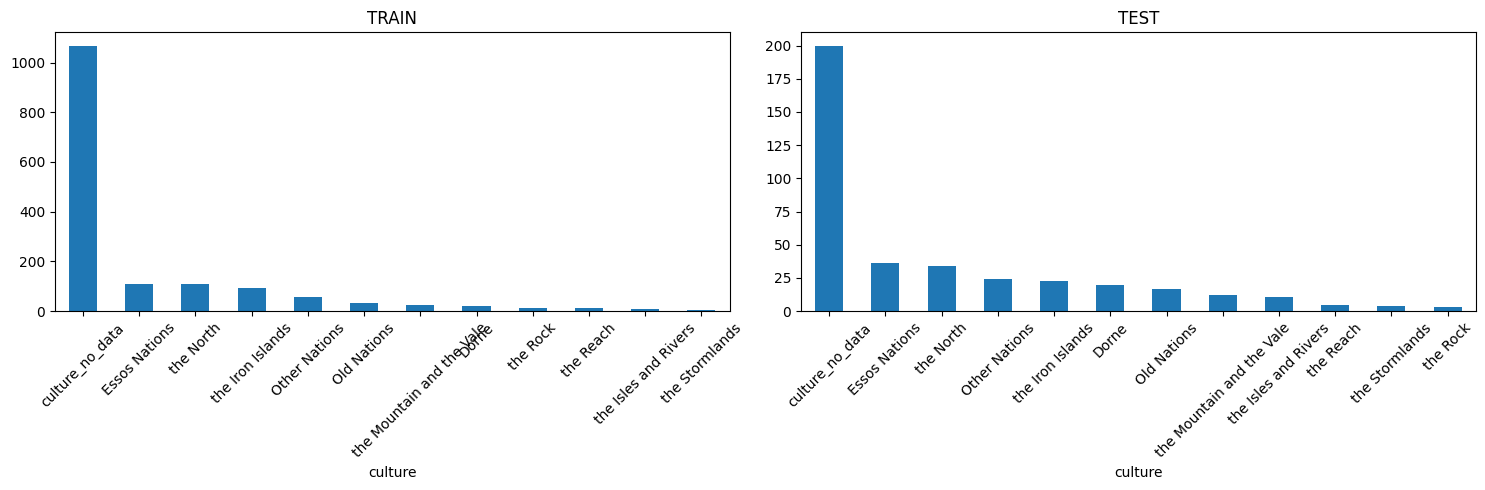

In [616]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

data.culture.value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('TRAIN')
ax1.tick_params(axis='x', rotation=45)

data_test.culture.value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('TEST')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

In [617]:
# гляну на результат моделей, если чего вернусь

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [618]:
# больше не придумал что делать с house, даже если прилумаем алгоритм
# заполнения, связанным с culture, title и тд, бужет очень много уникальных значений
# а занчит и много фичей после OneHotEncoder, не будем перегружать модели, сделаем
# фичу бинарной

data.house = np.where(data.house.isna(), 0, 1)
data_test.house = np.where(data_test.house.isna(), 0, 1)

In [619]:
# Количество уникальнх значений в каждом столбце
data.nunique()

,0
name,1557
title,2
male,2
culture,12
mother,16
father,19
heir,20
house,2
spouse,186
isAliveMother,2


In [620]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = np.number).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

,count,min,max,N_unique_values
title,1557.0,0.0,1.000000,2
male,1557.0,0.0,1.000000,2
house,1557.0,0.0,1.000000,2
isAliveMother,18.0,0.0,1.000000,2
isAliveFather,22.0,0.0,1.000000,2
isAliveHeir,21.0,0.0,1.000000,2
isAliveSpouse,200.0,0.0,1.000000,2
isMarried,1557.0,0.0,1.000000,2
isNoble,1557.0,0.0,1.000000,2
popularity,1557.0,0.0,2.004321,117


Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [621]:
# для начала снесу mother, father, heir, spouse

data.drop(columns=['spouse', 'mother', 'father', 'heir'], inplace=True)
data_test.drop(columns=['spouse', 'mother', 'father', 'heir'], inplace=True)

In [622]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveSpouse,,
0.0,0.619048,42
1.0,0.753165,158
NaN,0.786293,1357


In [623]:
data.groupby('isAliveMother', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveMother', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveMother,,
0.0,0.166667,6
1.0,0.166667,12
NaN,0.785575,1539


In [624]:
data.groupby('isAliveFather', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveFather', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveFather,,
0.0,0.235294,17
1.0,0.400000,5
NaN,0.785668,1535


In [625]:
data.groupby('isAliveHeir', dropna = False)['isAlive'].mean()
pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveHeir', aggfunc=['mean', 'count'], dropna=False)

,mean,count
,isAlive,isAlive
isAliveHeir,,
0.0,0.000000,7
1.0,0.357143,14
NaN,0.785807,1536


In [626]:
# идея в том, что наследника может и не быть у героя, поэтому мы к этой фиче применем OHE
# фичу касаемо супружества мы удалим, т.к есть фича isMarried, т.к эти фичи зависимы друг от друга
# а родители есть у каждого героя, например если они упоминались - то вероятно герой важный и популярный,
# поэтому что касается родителей - сделаем бинарный признак, в котором объединим родителей (упоминался или нет)

data['heir'] = np.where(data.isAliveHeir.isna(), -1, data.isAliveHeir)
data_test['heir'] = np.where(data_test.isAliveHeir.isna(), -1, data_test.isAliveHeir)

data['parrents'] = np.where(data.isAliveMother.isna() & data.isAliveFather.isna(), 0, 1)
data_test['parrents'] = np.where(data_test.isAliveMother.isna() & data_test.isAliveFather.isna(), 0, 1)

data.drop(columns=['isAliveMother','isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data_test.drop(columns=['isAliveMother','isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [628]:
data_test[data_test['age'].isna()]

,name,title,male,culture,house,isMarried,isNoble,age,popularity,boolDeadRelations,age_sum_birth,books,spouse,heir,parrents
S.No,,,,,,,,,,,,,,,
1685,Doreah,0,0,Essos Nations,1,0,0,None,1.080511,0,0,1,-1.0,-1.0,0
1869,Rhaego,0,0,culture_no_data,1,0,0,None,1.248523,1,0,1,-1.0,-1.0,0


In [ ]:
# видим что о родителях информация отсутствует, нет наследника, не в браке, но в то же время эти
# герои имеют не самую низкую популярность, относятся к домам
# предполагаю

In [633]:
data

,name,title,male,culture,house,isMarried,isNoble,age,popularity,isAlive,boolDeadRelations,age_sum_birth,books,spouse,heir,parrents
S.No,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,0,1,culture_no_data,0,0,0,child,1.789123,0,1,-1,0,-1.0,0.0,1
2,Walder Frey,1,1,the Isles and Rivers,1,1,1,old,1.957282,1,1,1,1,1.0,-1.0,0
3,Addison Hill,1,1,culture_no_data,1,0,1,adult,1.443355,1,0,-1,1,-1.0,-1.0,0
4,Aemma Arryn,1,0,culture_no_data,1,1,1,young,1.287682,0,0,0,0,0.0,-1.0,0
5,Sylva Santagar,1,0,Dorne,1,1,1,adult,0.728177,1,0,1,1,1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,1,1,culture_no_data,0,0,1,adult,1.231814,1,0,-1,1,-1.0,-1.0,0
1554,Masha Heddle,0,0,culture_no_data,0,0,0,child,0.700130,0,0,-1,0,-1.0,-1.0,0
1555,Matthos Seaworth,0,1,culture_no_data,1,0,0,child,0.939135,0,0,-1,1,-1.0,-1.0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [ ]:
data = # ...

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

In [ ]:
#Подсказка
data_test.loc[data_test['age']<0] # Находим данные с ошибками в дате рождения и возрасте

In [ ]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_test.loc[1685, 'dateOfBirth'] = 278.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)